# Abalone Age Prediction (k-Nearest Neighbor)

### Problem: Predicting the age of abalone from physical measurements.

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.
Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

#### Feature Description:
1. Sex --> M, F, and I (infant)
2. Length (mm) --> Longest shell measurement
3. Diameter (mm) --> perpendicular to length
3. Height (mm) --> with meat in shell
5. Whole weight (grams) --> whole abalone
6. Shucked weight (grams) --> weight of meat
7. Viscera weight (grams) --> gut weight (after bleeding)
8. Shell weight (grams) --> after being dried
9. Age --> Young, Adult, and Old

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read data from ‘abalone.csv’

In [2]:
df = pd.read_csv('abalone.csv')

### 2. Basic Exploration & Data Cleaning & Feature Engineering (if any):

#### 2.1 How many records and columns this data set has?

In [3]:
# Display how many rows and columns
df.shape

(500, 9)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,Adult
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,Adult
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,Young


#### 2.2 What is the data type of each feature?

In [5]:
# Display data types of each column
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Age                object
dtype: object

In [6]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506790,0.400600,0.138800,0.785165,0.308956,0.170249,0.249127
std,0.125027,0.104598,0.040999,0.480562,0.184053,0.103309,0.158142
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
25%,0.438750,0.340000,0.110000,0.391000,0.163375,0.084500,0.125000
50%,0.530000,0.420000,0.140000,0.776750,0.304500,0.163000,0.245000
75%,0.595000,0.475000,0.170000,1.074375,0.429750,0.240875,0.340000
max,0.745000,0.600000,0.240000,2.550000,1.070500,0.541000,1.005000


#### 2.3 Data Cleaning:
Is there any missing value? If so, fix them.

In [7]:
# Finding missing values for each feature:
df.isnull().sum()

# Percentages of missing values for each feature
#df.isnull().sum()/len(df)*100

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [8]:
# Finding missing values for each sample:
#df.isnull().sum(axis=1)
df.isnull().sum(axis=1).sum()

#Percentages of missing values for each sample:
#df.isnull().sum(axis=1)/len(df.columns)*100

0

#### 2.4 Feature Engineering: 
Is this dataset mixed-type data?, If so, transform all categorical to numeric.

In [9]:
# get all numberic features
num_data = df.select_dtypes(include=['number']) 
# get all nominal / ordinal / Boolean features
cat_data = df[['Sex']]
# get class
class_target = df.Age

In [10]:
num_data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [11]:
cat_data.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [12]:
class_target.head()

0      Old
1    Young
2    Adult
3    Adult
4    Young
Name: Age, dtype: object

In [13]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,Sex_F,Sex_I,Sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
495,1,0,0
496,1,0,0
497,1,0,0
498,1,0,0


In [14]:
#Combine all transformed features together
transform_num_data = pd.concat([cat_data, num_data], axis=1)
transform_num_data.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


#### 2.5 Defining Features (X) and Class (Y)

In [15]:
X = transform_num_data
Y = class_target

#### 2.6 Normalization

In [16]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X)
X = mms.fit_transform(X)

### 3. Building and Evaluating K-Nearest Neighbors (KNN) Models

#### 3.1 Train and Test on the Entire Dataset:
1. Build the KNN model with k=2 on the entire dataset.
2. Report "Training Accuracy".

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  0.806


#### 3.2 Splitting Training-Test Data:
1. Stratified split the dataset into the training and test sets: training (70%), test (30%).
2. Build the KNN model with k=2 on the training set. 
3. Report "Testing Accuracy".

In [18]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (350, 10)
y_train shape:  (350,)
x_test shape:  (150, 10)
y_test shape:  (150,)


In [19]:
Y.value_counts()

Adult    273
Young    116
Old      111
Name: Age, dtype: int64

In [20]:
y_train.value_counts()

Adult    191
Young     81
Old       78
Name: Age, dtype: int64

In [21]:
y_test.value_counts()

Adult    82
Young    35
Old      33
Name: Age, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  0.66


#### 3.3 Stratified k-fold Cross Validation:
1. Build the KNN model with k=2.
2. Evaluate with 10-fold cross validaiton.
3. Report "10-fold Cross Validation Accuracy".

In [23]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2 
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Cross Validation Accuracy: 0.670 +/- 0.061


### 4. What is the optimum (best) k value for the KNN model of this dataset?
1. Use 10-fold cross validation
2. Use k range from 1 t0 30

In [24]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.61
2 0.6700000000000002
3 0.6739999999999999
4 0.678
5 0.6799999999999999
6 0.694
7 0.6900000000000001
8 0.692
9 0.694
10 0.6900000000000001
11 0.67
12 0.692
13 0.688
14 0.692
15 0.688
16 0.696
17 0.696
18 0.706
19 0.708
20 0.712
21 0.7
22 0.7020000000000001
23 0.69
24 0.692
25 0.6900000000000001
26 0.688
27 0.696
28 0.696
29 0.696


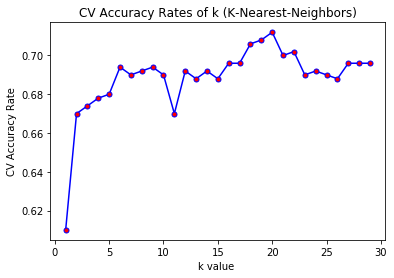

In [25]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [26]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  20 accuracy =  0.712


#### k = 20 (accuracy =  0.708) seems to be too many, let's pick the smallest one that provides good accuracy --> k=6 (accuacy = 0.7)

### 5. KNN: Model Creation
Creating KNN model from the entrie data set, with the best k found in the previous step.

In [27]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=6 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=6, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### 6. KNN: Deploying the model
What are the predicted class labels of the new data (abalone_new_sample.csv) using the best classification model?

#### 6.1 Data Pre-processing for New Data
Is data in "abalone_new_sample.csv" ready for prediction? If not, fix it first.

In [28]:
# Predict the class label for new record(s)
X_new = pd.read_csv('abalone_sample_data.csv')  # (1) read new instances
X_new

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,I,0.33,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [29]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(X_new[['Sex']])
cat_data

,Sex_F,Sex_I,Sex_M
0,0,0,1
1,1,0,0
2,0,1,0


In [30]:
#Combine all transformed features together
X_new = pd.concat([cat_data, X_new], axis=1)
X_new

,Sex_F,Sex_I,Sex_M,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0,1,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,1,0,0,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0,1,0,I,0.33,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [31]:
#Drop un-used feature
X_new = X_new.drop(columns=['Sex'])
X_new

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0,1,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,1,0,0,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0,1,0,0.33,0.255,0.080,0.2050,0.0895,0.0395,0.055


#### 6.2 What are the predicted class labels of the new data using the best classification model?

In [32]:
X_new = mms.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
prediction = best_knn.predict(X_new) # (3) predict their class lables

In [33]:
prediction

array(['Adult', 'Adult', 'Young'], dtype=object)

In [34]:
import pickle 
pickle.dump(best_knn, open('best_knn.pkl', 'wb')) 
pickle.dump(mms, open('normalization.pkl', 'wb'))